In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Parses a metrics log line. Returns a struct with metrics. Returns None if this is not a metrics log.
def metrics_log(log):
    pattern = re.compile(
        r"\[METRIC\] BLOCK EXECUTION THROUGHPUT \(([\d]+)\): ([\d.]+) Ggas/s TIME SPENT: ([\d]+) ms. Gas Used: ([\d.]+) \(([\d]+)%\), #Txs: ([\d]+). exec: ([\d]+)% merkle: ([\d]+)% store: ([\d]+)%"
    )

    match = pattern.search(log)
    if match:
        return {
            "block_number": int(match.group(1)),
            "throughput": float(match.group(2)),
            "time_spent": int(match.group(3)),
            "gas_used": float(match.group(4)),
            "gas_percentage": int(match.group(5)),
            "num_txs": int(match.group(6)),
            "exec_pct": int(match.group(7)),
            "merkle_pct": int(match.group(8)),
            "store_pct": int(match.group(9)),
        }

In [3]:
# Parses a full log file. Returns a pandas dataframe.
def log_to_df(filename):
    with open(filename) as file:
        metrics = []
        lines = file.readlines()
        for line in lines:
            metric = metrics_log(line)
            if metric:
                metrics.append(metric)
    return pd.DataFrame(metrics)

In [4]:
def plot_proportions(df):
    plt.figure(figsize=(20, 4))
    
    plt.stackplot(
        df['block_number'],
        df['exec_pct'],
        df['merkle_pct'],
        df['store_pct'],
        labels=['Exec %', 'Merkle %', 'Store %'],
        alpha=0.8
    )
    
    plt.xlabel('Block Number')
    plt.ylabel('Percentage')
    plt.title('Proportion of Exec, Merkle, and Store per Block')
    plt.legend(loc='upper right')
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

In [5]:
def plot_time_spent(df):
    plt.figure(figsize=(20, 4))
    
    plt.stackplot(
        df['block_number'],
        df['exec_pct']*df['time_spent']/100,
        df['merkle_pct']*df['time_spent']/100,
        df['store_pct']*df['time_spent']/100,
        labels=['Exec %', 'Merkle %', 'Store %'],
        alpha=0.8
    )
    
    plt.xlabel('Block Number')
    plt.ylabel('Time spent (ms)')
    plt.title('Time spent per block, divided by exec, merkle and storage')
    plt.legend(loc='upper right')
    plt.ylim(0, 170)
    plt.tight_layout()
    plt.show()

In [6]:
def plot_throughput(df):
    plt.figure(figsize=(20, 4))
    plt.plot(df['block_number'], df['throughput'], label='Throughput (Ggas/s)')
    
    plt.xlabel('Block Number')
    plt.ylabel('Throughput (Ggas/s)')

    # We limit the y axis to prevent outliers from making normal values look too small
    plt.ylim(0,0.6)
    plt.title('Block Throughput per Block Number')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [7]:
df = log_to_df("load-test-logs.txt")

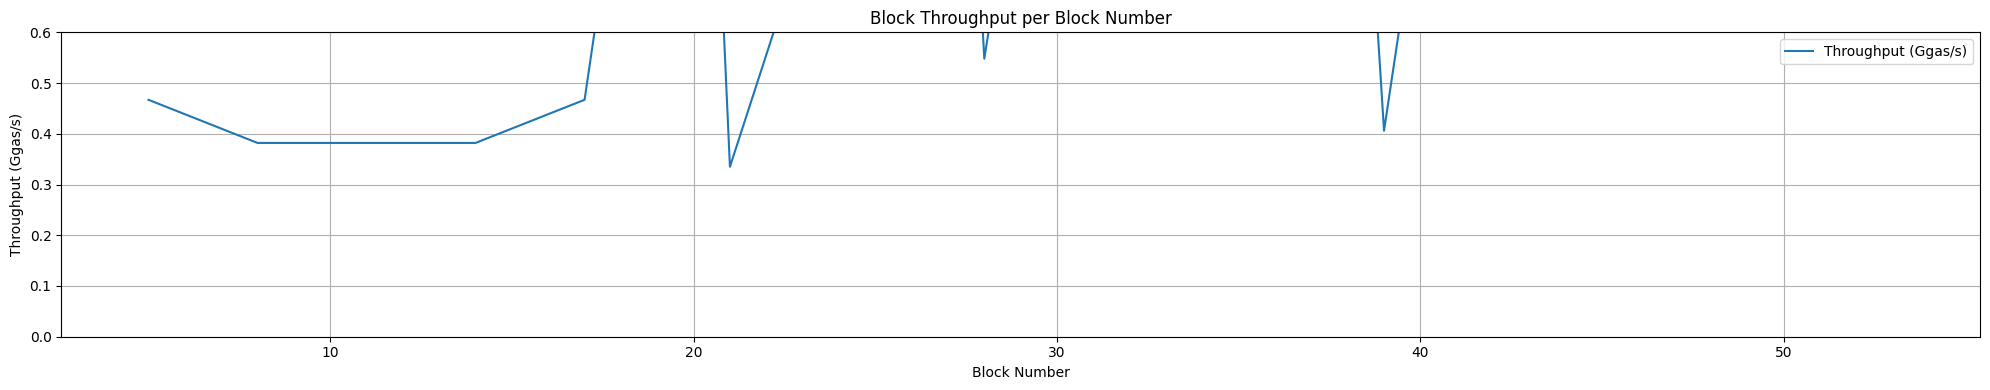

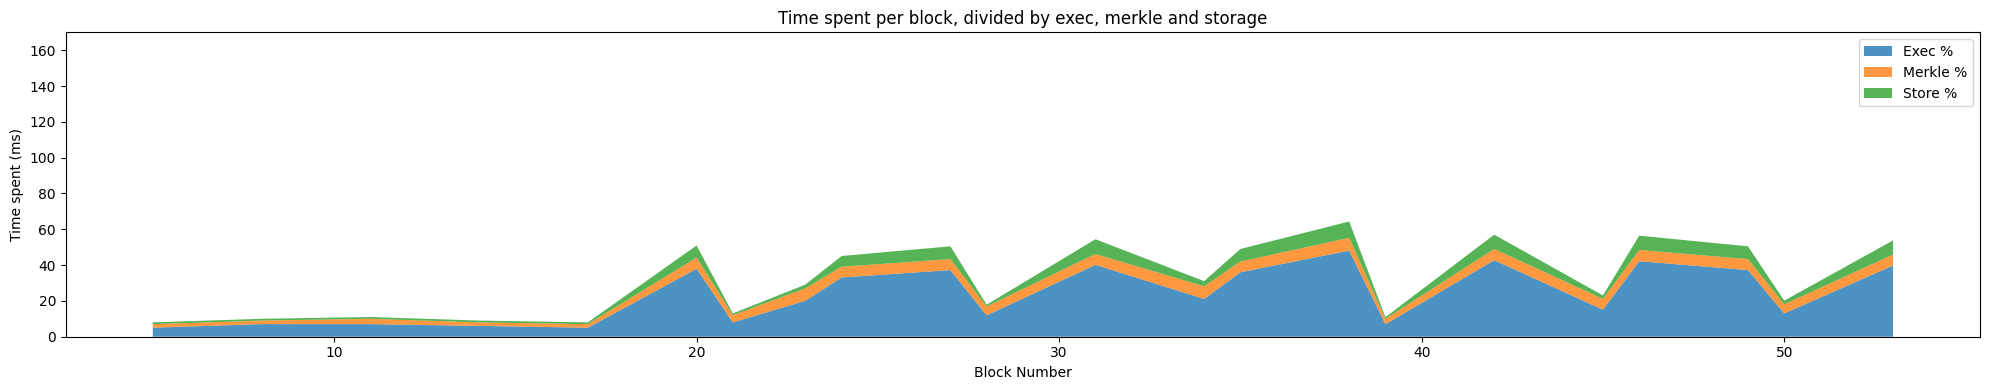

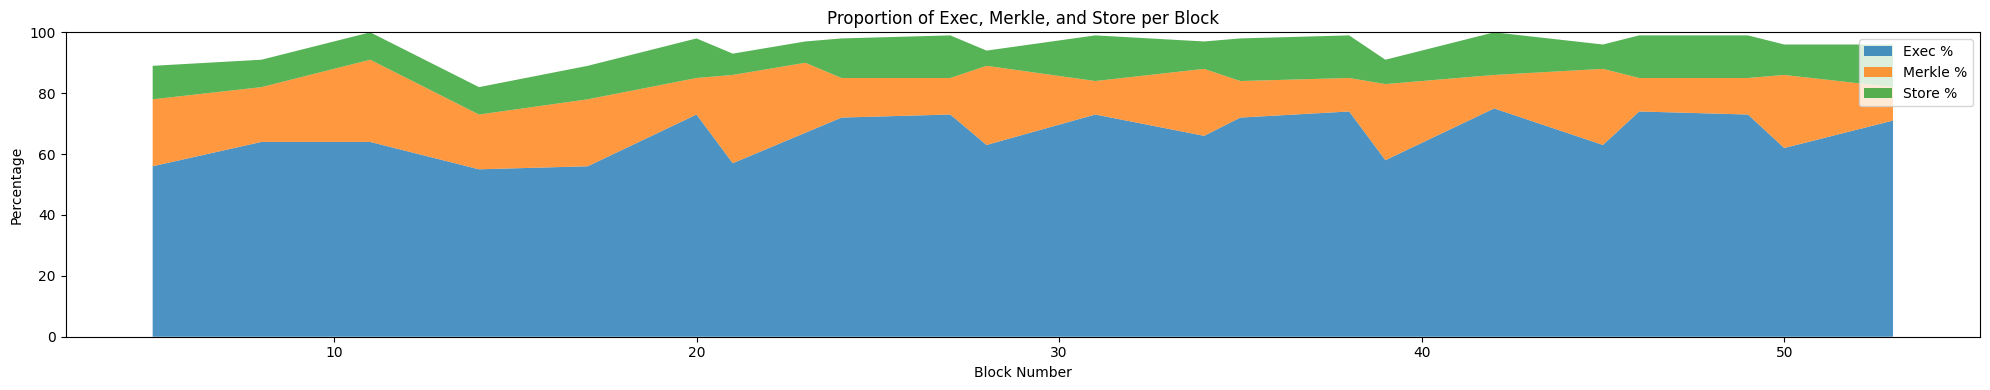

In [8]:
plot_throughput(df)
plot_time_spent(df)
plot_proportions(df)